In [1]:
cd H:\General\Images

H:\General\Images


In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize']=[16,8]

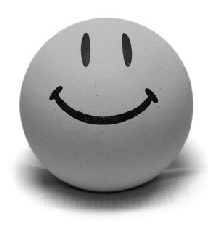

In [3]:
A = imread('smiley.jpg')
X = np.mean(A,-1)  # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [9]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

In [10]:
S.shape

(277, 277)

In [12]:
r = 2
S[0:r,:r]

array([[53332.79139013,     0.        ],
       [    0.        ,  6732.45069575]])

In [16]:
np.cumsum(S[0:r,:r])

array([53332.79139013, 53332.79139013, 53332.79139013, 60065.24208589])

In [17]:
np.sum(S[0:r,:r])

60065.24208588664

In [14]:
np.cumsum(S[0:r,:r])/np.sum(S[0:r,:r])

array([0.88791437, 0.88791437, 0.88791437, 1.        ])

In [15]:
np.cumsum(np.diag(S))/np.sum(np.diag(S))

array([0.51528694, 0.58033405, 0.63437702, 0.66557599, 0.69268326,
       0.71669335, 0.74045689, 0.75665754, 0.76820736, 0.77889909,
       0.78857504, 0.79752372, 0.8050736 , 0.81230075, 0.81928472,
       0.82561146, 0.83130423, 0.83673903, 0.84174446, 0.84652202,
       0.85109932, 0.85557314, 0.85953706, 0.86335489, 0.86705672,
       0.87063425, 0.87388006, 0.87710674, 0.8801381 , 0.88311839,
       0.8859994 , 0.88885027, 0.8915738 , 0.8941498 , 0.89668218,
       0.89909563, 0.90144512, 0.90377064, 0.90604939, 0.90826385,
       0.91038552, 0.91245508, 0.91446514, 0.91637262, 0.91821127,
       0.92003105, 0.9218064 , 0.92352214, 0.92519524, 0.92678384,
       0.92833719, 0.92987212, 0.93137597, 0.93281031, 0.93419544,
       0.93557195, 0.93690811, 0.93823617, 0.9395267 , 0.94077563,
       0.94199724, 0.94317666, 0.94433878, 0.94544126, 0.94653263,
       0.94760521, 0.94864877, 0.9496726 , 0.95065979, 0.9516162 ,
       0.9525555 , 0.95348395, 0.95438644, 0.95528158, 0.95615

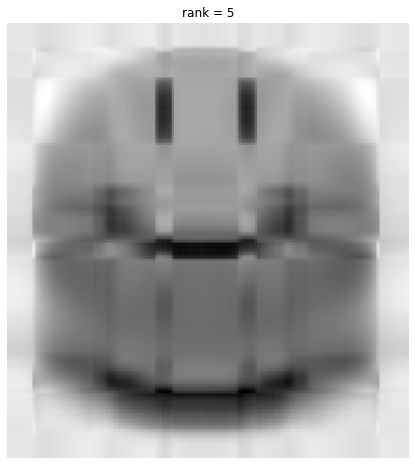

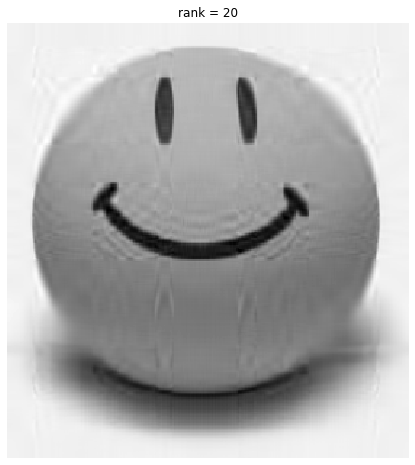

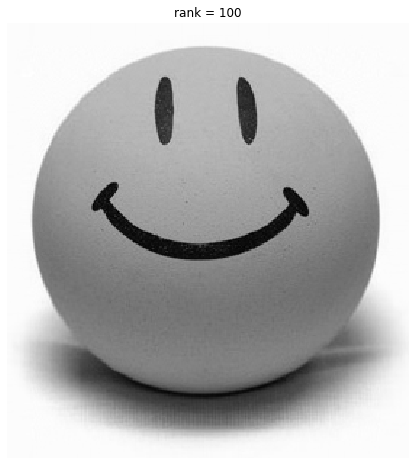

In [13]:
j = 0
for r in (5,20,100):
    # Construct approximate image
    Xapprox = U[:,:r]@S[0:r,:r]@VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('rank = '+str(r))
    plt.show()

##### Plotting the singular values:

 $log(\sigma_j)$ v/s $j$

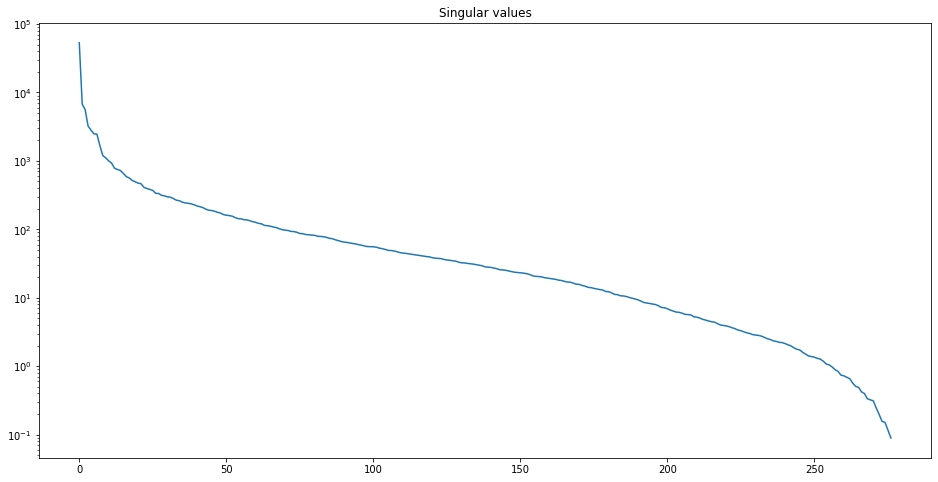

In [17]:
plt.semilogy(np.diag(S))
plt.title('Singular values')
plt.show()

##### Plotting the cumulative sum of singular values:

$$\frac{\sum_{j=1}^{r}\sigma_j}{\sum_{j=1}^{m}\sigma_j}$$
This shows the fraction of energy captured by the first $r$ modes.

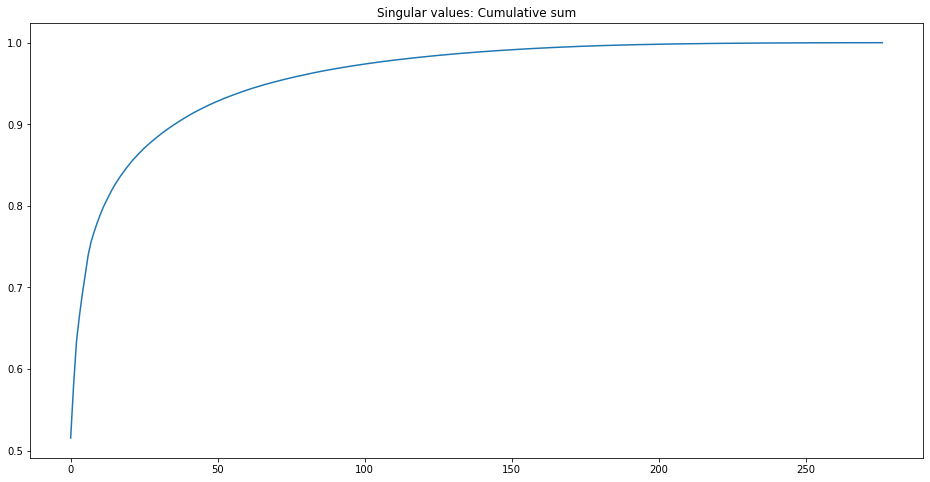

In [18]:
plt.figure()
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular values: Cumulative sum')
plt.show()